In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# #1
Загрузите прилагающийся датасет credit_data. 

In [3]:
data = pd.read_csv('credit_data.csv',index_col=0)
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [4]:
print(data.isna().sum())

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


# #2
Проверьте датасет на наличие текстовых атрибутов. Замените текстовые атрибуты на числовые без потери качества данных.

In [5]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [6]:
data.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [7]:
data = data.drop(['Purpose'], axis=1)

In [8]:
target = data['Risk']
data = data.drop(['Risk'], axis=1)

In [9]:
data['Saving accounts'] = data['Saving accounts'].map({"little":1,"moderate":2,"quite rich":3 ,"rich":4 })
data['Checking account'] = data['Checking account'].map({"little":1,"moderate":2,"rich":3 })
target = target.map({"good":1,"bad":0})
data['Saving accounts'] = data['Saving accounts'].fillna(0)
data['Checking account'] = data['Checking account'].fillna(0)

In [10]:
new_data = pd.get_dummies(data)
new_data.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent
0,67,2,0.0,1.0,1169,6,0,1,0,1,0
1,22,2,1.0,2.0,5951,48,1,0,0,1,0
2,49,1,1.0,0.0,2096,12,0,1,0,1,0
3,45,2,1.0,1.0,7882,42,0,1,1,0,0
4,53,2,1.0,1.0,4870,24,0,1,1,0,0


# #3
Выведите информацию о количественных параметрах датасета

In [11]:
new_data[['Age', 'Job', 'Credit amount', 'Duration']].describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


# #4
Разделите эти данные на тестовую и обучающую выборки

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.2)

# #5
Обучите модель случайных лесов на обучающей выборке. Проверьте точность предсказаний.

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
model.score(X_test, y_test)

0.705

# #6
Оцените полученную модель с помощью метрик.

In [15]:
from sklearn.metrics import classification_report

print(classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.39      0.47      0.43        47
           1       0.83      0.78      0.80       153

    accuracy                           0.70       200
   macro avg       0.61      0.62      0.61       200
weighted avg       0.72      0.70      0.71       200



# #7
Понизьте размерность данных с помощью метода главных компонент.

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
X = normalize(new_data)
x_PCA = PCA(n_components=2).fit_transform(X)
print(x_PCA)

[[ 0.03630695 -0.01025028]
 [-0.01586092  0.00208925]
 [ 0.00306965 -0.00370295]
 ...
 [ 0.02823663  0.00116697]
 [-0.00433194  0.01660272]
 [-0.01336967  0.00344476]]


In [17]:
print(X)
print(x_PCA)

[[0.05721914 0.00170803 0.         ... 0.         0.00085402 0.        ]
 [0.00369671 0.00033606 0.00016803 ... 0.         0.00016803 0.        ]
 [0.02337108 0.00047696 0.00047696 ... 0.         0.00047696 0.        ]
 ...
 [0.04720548 0.0024845  0.00124225 ... 0.         0.00124225 0.        ]
 [0.01246144 0.0010836  0.0005418  ... 0.0005418  0.         0.        ]
 [0.00589996 0.00043703 0.00043703 ... 0.         0.00021852 0.        ]]
[[ 0.03630695 -0.01025028]
 [-0.01586092  0.00208925]
 [ 0.00306965 -0.00370295]
 ...
 [ 0.02823663  0.00116697]
 [-0.00433194  0.01660272]
 [-0.01336967  0.00344476]]


# #8
Обучите заново модель случайных лесов и оцените ее эффективность с помощью метрик.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x_PCA, target, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

print(classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.21      0.35      0.26        34
           1       0.85      0.73      0.78       166

    accuracy                           0.67       200
   macro avg       0.53      0.54      0.52       200
weighted avg       0.74      0.67      0.69       200



# #9
Постройте график зависимости точности модели от размерности данных.

In [19]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

n_components = list(range(1, 12))
accuracy = []
recall = []
precision = []

for n in n_components:
    X = normalize(new_data)
    x_PCA = PCA(n_components=n).fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(x_PCA, target, test_size=0.2, random_state=0)
    
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    accuracy.append(accuracy_score(model.predict(X_test), y_test))
    recall.append(recall_score(model.predict(X_test), y_test))
    precision.append(precision_score(model.predict(X_test), y_test))

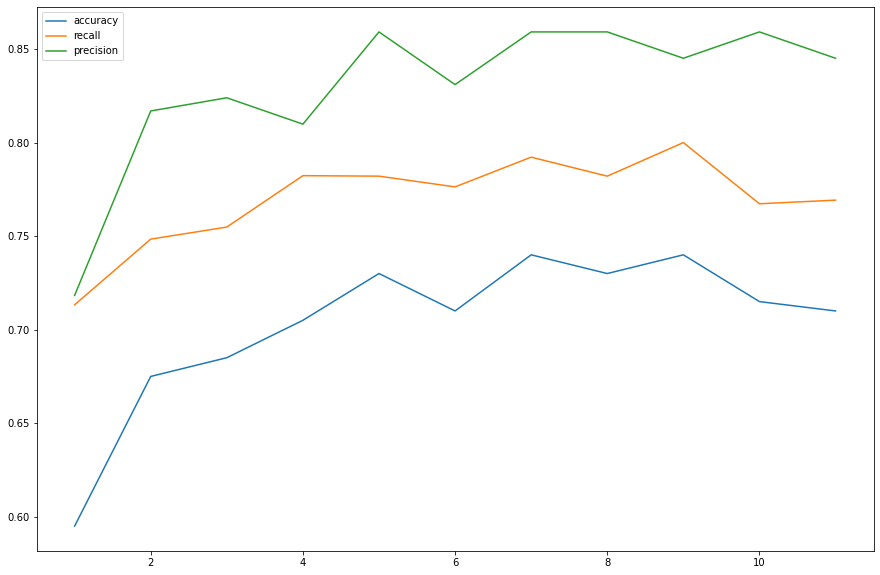

In [20]:
plt.figure(1, (15, 10))
plt.plot(n_components, accuracy, label='accuracy')
plt.plot(n_components, recall, label='recall')
plt.plot(n_components, precision, label='precision')
plt.legend()
plt.show()